In [165]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
plt.style.use("seaborn")

C:\Users\Hp\AppData\Local\Temp\ipykernel_2868\183428500.py:6: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn")


In [166]:
data = pd.read_csv("Ecommerce Customers.csv")
data.head()

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\nPort Jacobville, PR 3...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092


In [167]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Email                 500 non-null    object 
 1   Address               500 non-null    object 
 2   Avatar                500 non-null    object 
 3   Avg. Session Length   500 non-null    float64
 4   Time on App           500 non-null    float64
 5   Time on Website       500 non-null    float64
 6   Length of Membership  500 non-null    float64
 7   Yearly Amount Spent   500 non-null    float64
dtypes: float64(5), object(3)
memory usage: 31.4+ KB


In [168]:
data['Avatar'].unique()

array(['Violet', 'DarkGreen', 'Bisque', 'SaddleBrown', 'MediumAquaMarine',
       'FloralWhite', 'DarkSlateBlue', 'Aqua', 'Salmon', 'Brown',
       'Tomato', 'RoyalBlue', 'DarkBlue', 'Peru', 'PowderBlue',
       'OliveDrab', 'Cyan', 'LightSeaGreen', 'PeachPuff', 'Black',
       'Olive', 'Silver', 'Wheat', 'Teal', 'Linen', 'MediumSlateBlue',
       'LemonChiffon', 'DarkOrchid', 'SeaGreen', 'SteelBlue',
       'DarkMagenta', 'DarkGoldenRod', 'DarkSeaGreen', 'Gainsboro',
       'HotPink', 'HoneyDew', 'WhiteSmoke', 'GhostWhite', 'Chocolate',
       'Snow', 'BurlyWood', 'Moccasin', 'BlueViolet', 'MediumBlue',
       'GreenYellow', 'SandyBrown', 'MediumVioletRed', 'DarkOliveGreen',
       'DarkSalmon', 'DeepPink', 'SkyBlue', 'Magenta', 'DarkTurquoise',
       'SpringGreen', 'OrangeRed', 'LimeGreen', 'LightGreen',
       'LightYellow', 'MintCream', 'DimGray', 'Indigo', 'LightSalmon',
       'DeepSkyBlue', 'Turquoise', 'LightSteelBlue', 'Cornsilk',
       'DarkKhaki', 'FireBrick', 'SlateGray',

In [169]:
data.columns

Index(['Email', 'Address', 'Avatar', 'Avg. Session Length', 'Time on App',
       'Time on Website', 'Length of Membership', 'Yearly Amount Spent'],
      dtype='object')

In [170]:
len(data.columns)

8

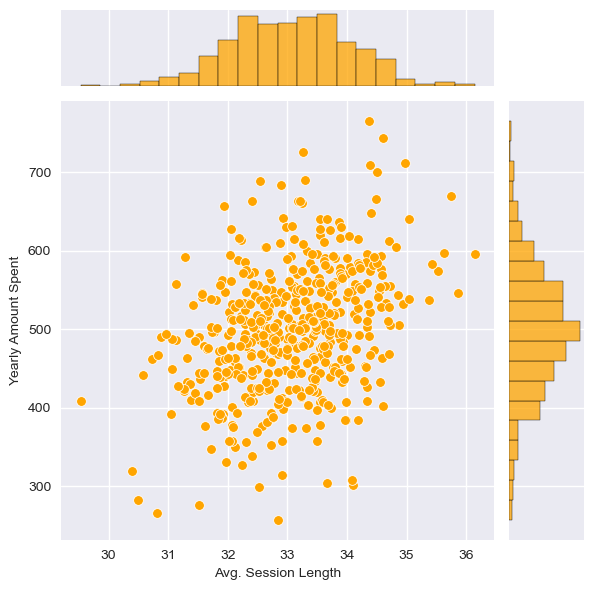

In [171]:
sns.jointplot(x = "Avg. Session Length" , y = "Yearly Amount Spent" , data = data , color = "orange")
plt.show()

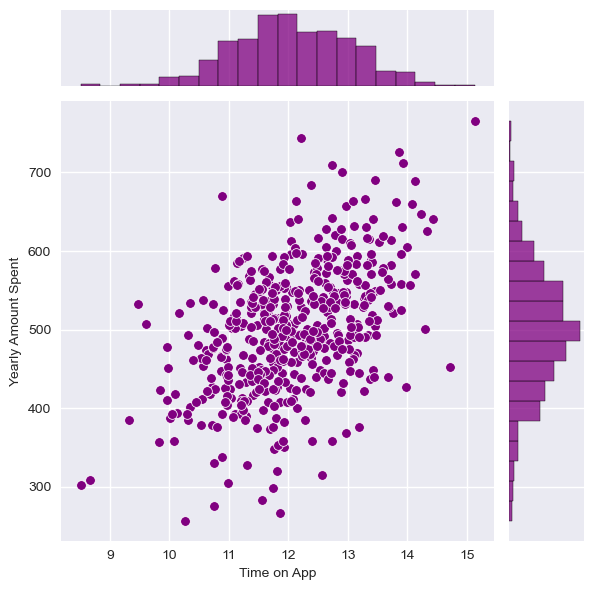

In [172]:
sns.jointplot(x = "Time on App" , y = "Yearly Amount Spent" , data = data , color = "purple")
plt.show()

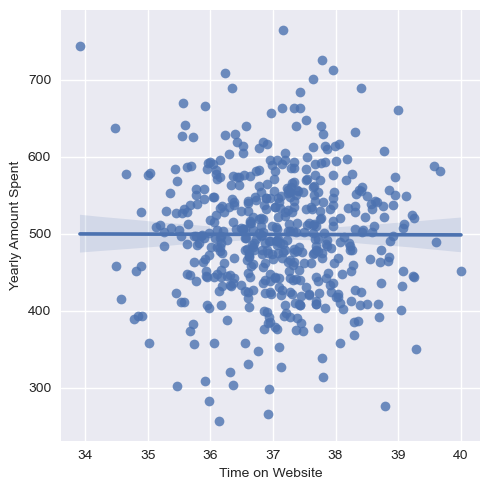

In [173]:
sns.lmplot(x="Time on Website" , y="Yearly Amount Spent" , data = data)
plt.show()

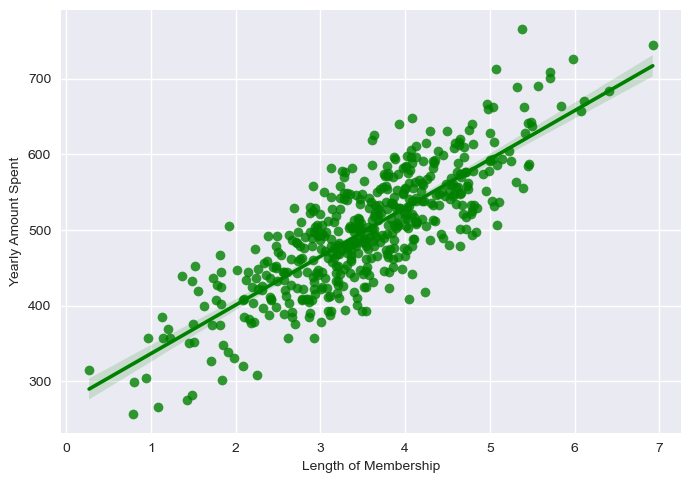

In [174]:
sns.regplot(x = "Length of Membership" , y = "Yearly Amount Spent" , data=data , color="green")
plt.show()

C:\Users\Hp\AppData\Local\Temp\ipykernel_2868\1455047261.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data["Yearly Amount Spent"] , hist = True)


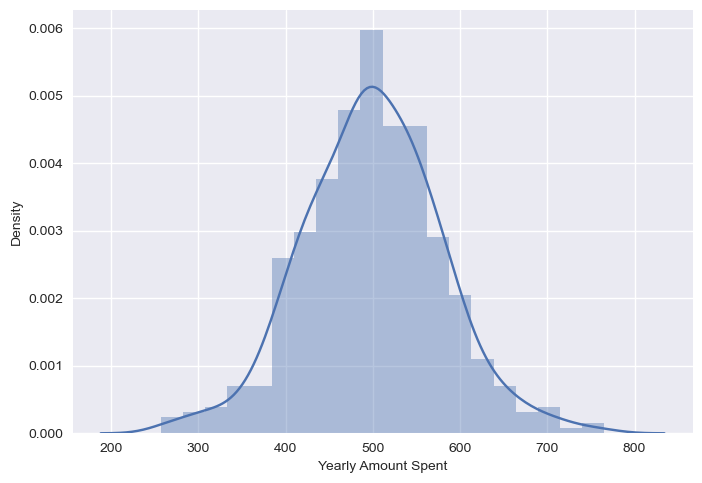

In [175]:

sns.distplot(data["Yearly Amount Spent"] , hist = True)
plt.show()

C:\Users\Hp\AppData\Local\Temp\ipykernel_2868\745092901.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(),annot=True)


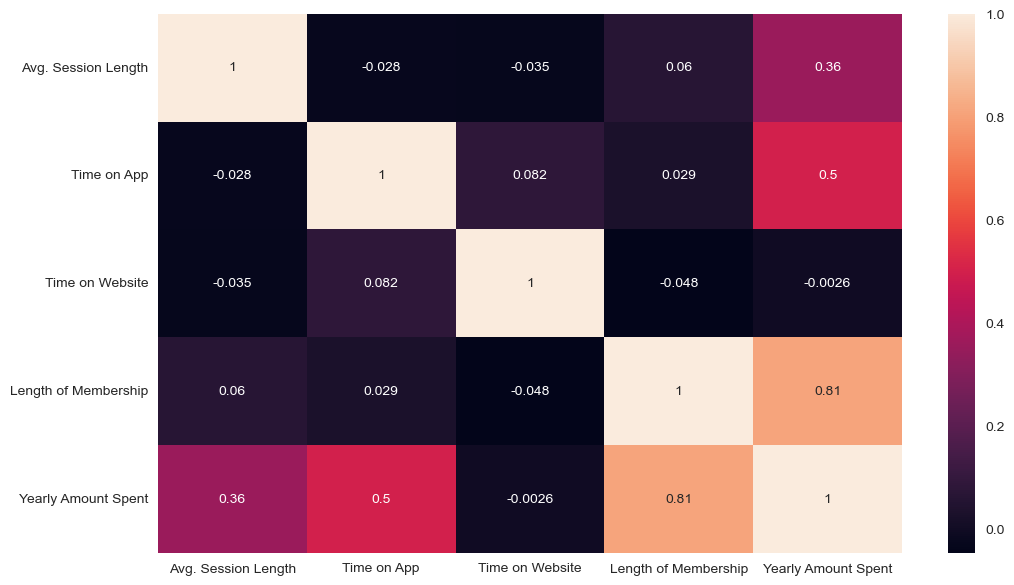

In [176]:
plt.figure(figsize=(12,7))
sns.heatmap(data.corr(),annot=True)
plt.show()

In [177]:
X = data[[ 'Avg. Session Length', 'Time on App' ,'Time on Website', 'Length of Membership' ]]
y = data['Yearly Amount Spent']
X.shape , y.shape , X.shape[0] 
n_features = X.shape[1] 

In [178]:
# Faeture Scaling
def featurescaling(X):
    Xmean = X.mean(axis=0)
    Xstd = X.std(axis=0)
    
    return (X - Xmean)/Xstd

X = featurescaling(X)

In [179]:
X.mean(axis=0) , X.std(axis=0)


(Avg. Session Length     2.927436e-15
 Time on App            -1.076472e-15
 Time on Website         6.274092e-15
 Length of Membership   -1.563194e-16
 dtype: float64,
 Avg. Session Length     1.0
 Time on App             1.0
 Time on Website         1.0
 Length of Membership    1.0
 dtype: float64)

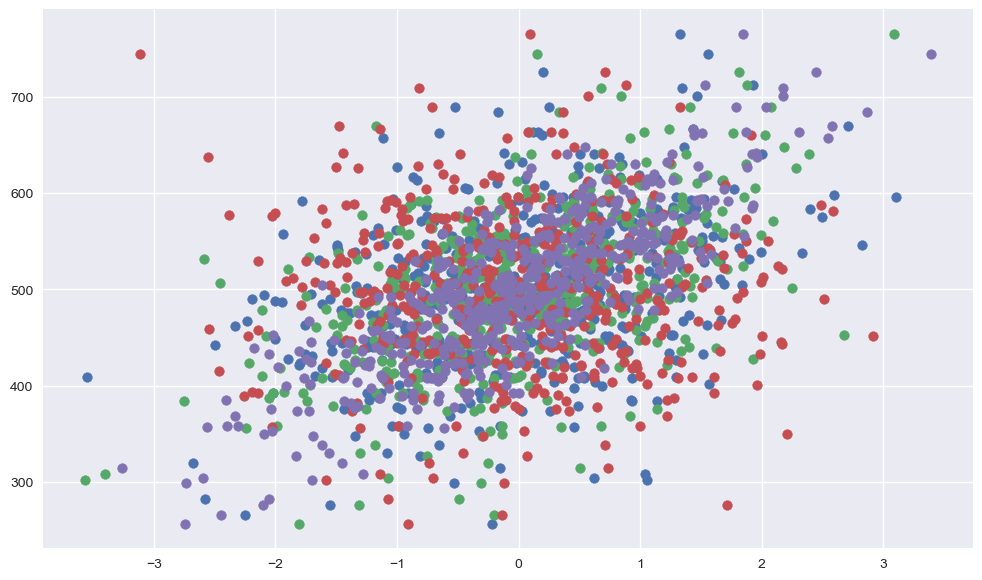

In [180]:
# visualization after Feature scaling
plt.figure(figsize=(12,7))
plt.scatter(X['Avg. Session Length'] , y)
plt.scatter(X['Time on App'] , y)
plt.scatter(X["Time on Website"] ,y)
plt.scatter(X["Length of Membership"],y)
plt.show()



In [181]:
#Outlier removal
z_score = (X - X.mean())/X.std()
z_threshold = 3
outlier_indice = np.where(np.abs(z_score)>z_threshold)
X = X.drop(outlier_indice[0])
y = y.drop(outlier_indice[0])

In [182]:
# Spliting the dataset into Testing and Training data
Xtrain , Xtest , ytrain , ytest = train_test_split(X, y , shuffle = False , random_state = 0)


In [183]:
# Defining the hypothesis Function
def hypothesis(X,theta):
    return np.dot(X,theta)
# Adding one new coloumn in X
def preprocess(X):
    if X.shape[1] == n_features :
        

        m = X.shape[0]
        ones = np.zeros((m,1))
        X = np.hstack((ones,X))
    return X

# Defining the cost function
def costfunction(X,y,theta):
    m = X.shape[0]
    error = np.sum((hypothesis(X,theta)-y)**2)
    
    return error/(2*m)

# Defining the derivative of costfunction

def derivative(X,y,theta):
    m = X.shape[0]
    y_predict = hypothesis(X,theta)
    derive = np.dot(X.T,(y_predict-y))
    
    return derive/m

In [184]:
# Defining the function for finding best parameters

def fit(X,y,alpha = 0.1 , max_itrs = 100):
    n = X.shape[1]
    theta = np.random.randn(n)
    error_list = []
    for i in range(max_itrs):
        e = costfunction(X,y,theta)
        error_list.append(e)
        derive = derivative(X,y,theta)
        
        theta = theta - alpha*derive
    plt.plot(error_list)   
    return theta
    

In [185]:
Xtrain = preprocess(Xtrain)
Xtrain.shape

(369, 5)

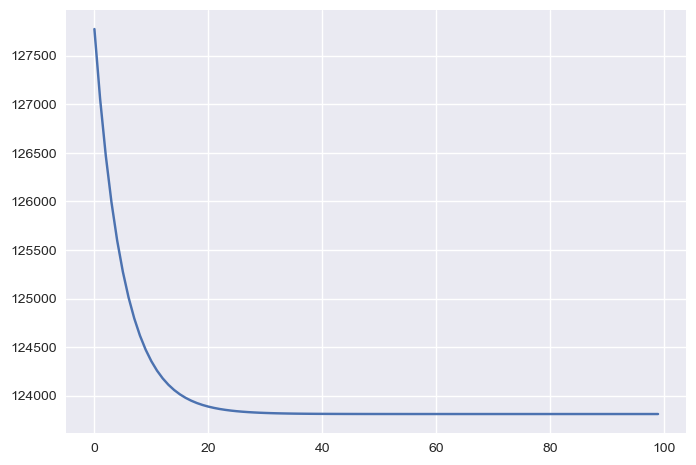

In [186]:
fit1 = fit(Xtrain,ytrain)

In [187]:
Xtest = preprocess(Xtest)

In [188]:
y_predict = hypothesis(Xtest,fit1)

In [189]:
# R2Score
def evaluation(y,y_predict):
    ymean = y.mean()
    
    num = np.sum((y-y_predict)**2)
    denom = np.sum((y - ymean)**2)
    
    return 1 - num/denom

In [190]:
evaluate = evaluation(ytest , y_predict)
evaluate

-46.54705495092336